numpy version:  1.14.1
pandas version:  0.21.0
initial centroids:  [[-7.  0.]
 [ 0.  0.]
 [ 7.  0.]]
initial error:  [7. 0. 7.]
final error:  [0. 0. 0.]
final Centroid:  [[-6.3830476 -5.8639297]
 [ 1.3525022  1.9241103]
 [ 8.546414  -3.6671133]]


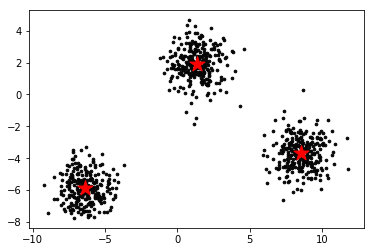

In [20]:
# Task 1. K-means clustering from scratch 

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from copy import deepcopy 

# from elice_utils import EliceUtils
# eu = EliceUtils()

# Check versions
print('numpy version: ', np.__version__)
print('pandas version: ', pd.__version__)

np.random.seed(12345)

# Q1. Create a dataset (X and y) with 3 clusters usng sklearn.datasets.make_blobs
X, y = make_blobs(n_samples= 800, n_features= 2, centers=3, random_state = 12345)

# Q2: define a function to calculate Euclidean distance
def dist(a, b, axis):
    return np.linalg.norm(a-b, axis=1)


# Q3. Number of clusters
K = 3

# X coordinates of initial centroids
C_x = [-7, 0, 7]
# Y coordinates of initial centroids
C_y = [0, 0, 0]

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

print("initial centroids: ", C)

# Plotting along with the initial Centroids
plt.scatter(X[:,0], X[:,1] , c='#050505', s=7)
# plt.scatter(C_x, C_y, marker='*', s=150, c='g')

# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print('initial error: ', error)

# Loop will run till the error is less than the threshold value
for ww in range(10):
    
    # Q4. Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C, 1)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Q5. Finding the new centroids by taking the average value
    for i in range(K):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None) 

print('final error: ', error)
print('final Centroid: ', C) 

# Plotting along with the final Centroids
plt.scatter(C[:,0], C[:,1], marker='*', s=250, c='r')
plt.show("final_cluster.png") 
# eu.send_image("final_cluster.png")
